## 신경망과 딥러닝
# 텐서플로와 케라스
- pip insall tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 선형회귀 적용

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data[:, :3]
y = iris.data[:, 3]
X.shape, y.shape

((150, 3), (150,))

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.5.0'

In [6]:
# GPU 사용여부 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6398836504374888079,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1417992603
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2253987620055196457
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(3,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer='sgd') # loss:오차값, optimizer:경사하강법종류, sgd: 확률적경사하강법

In [9]:
model.fit(X, y, epochs=20) # epochs: 반복횟수

Epoch 1/20
5/5 [==============================] - 2s 4ms/step - loss: 0.7953
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 0.5598
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 0.4046
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.2924
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 0.2276
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1785
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1549
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1175
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.1019
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0910
Epoch 11/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0873
Epoch 12/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0845
Epoch 13/20
5/5 [==============================] - 0s 5ms/step - loss: 0.

In [10]:
h = model.history.history

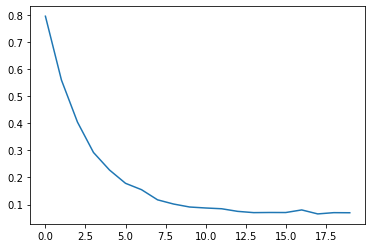

In [11]:
plt.plot(h['loss'])

In [12]:
y_pred = model.predict(X)

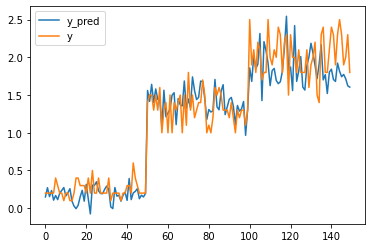

In [13]:
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])

In [14]:
mse = ((y - y_pred.ravel())**2).mean()
mse

0.0670213495216313

### 검증데이터 분리
- model.fit() 함수의 validation_split 옵션 적용

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(3,)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mse', optimizer='sgd')

In [51]:
model.fit(X, y, epochs=100, validation_split=0.25) # 총 데이터에서 25% 를 검증용으로 떼어 놓는다

Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 0.6627 - val_loss: 0.7479
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2321 - val_loss: 0.4901
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1756 - val_loss: 0.3100
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1513 - val_loss: 0.1968
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1046 - val_loss: 0.2819
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0786 - val_loss: 0.2934
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0626 - val_loss: 0.1253
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0580 - val_loss: 0.1179
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0446 - val_loss: 0.1249
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0364 - val_loss: 0.1620
Epoch 11/100
4/4 [=

Epoch 84/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0184 - val_loss: 0.0868
Epoch 85/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0204 - val_loss: 0.0981
Epoch 86/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0184 - val_loss: 0.1101
Epoch 87/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0182 - val_loss: 0.1110
Epoch 88/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0181 - val_loss: 0.1138
Epoch 89/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0186 - val_loss: 0.1430
Epoch 90/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0216 - val_loss: 0.1184
Epoch 91/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0178 - val_loss: 0.0898
Epoch 92/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0183 - val_loss: 0.1007
Epoch 93/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0186 - val_loss: 0.1068
Epoch 94/1

In [52]:
h = model.history.history

(0.0, 1.0)

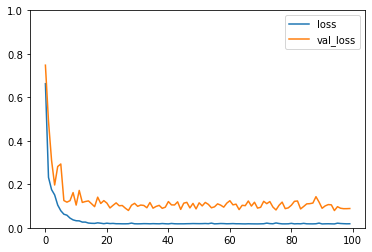

In [53]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim(0,1)

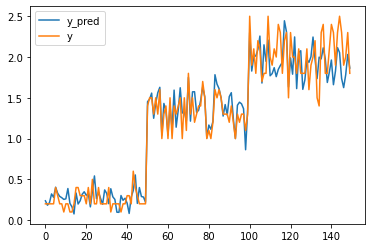

In [54]:
y_pred = model.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])

### 중간층 추가

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_shape=(3,), activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='mse', optimizer='sgd')

In [57]:
model.fit(X, y, epochs=100, validation_split=0.25)

Epoch 1/100
4/4 [==============================] - 0s 42ms/step - loss: 1.9015 - val_loss: 3.2648
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7242 - val_loss: 1.5803
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2856 - val_loss: 0.7791
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1381 - val_loss: 0.3916
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1037 - val_loss: 0.3559
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0988 - val_loss: 0.2904
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0953 - val_loss: 0.3149
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0893 - val_loss: 0.2824
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0852 - val_loss: 0.3165
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0814 - val_loss: 0.2769
Epoch 11/100
4/4 [=

Epoch 84/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0439 - val_loss: 0.2103
Epoch 85/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0436 - val_loss: 0.1938
Epoch 86/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0434 - val_loss: 0.2001
Epoch 87/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0434 - val_loss: 0.1904
Epoch 88/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0457 - val_loss: 0.1918
Epoch 89/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0432 - val_loss: 0.2032
Epoch 90/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0434 - val_loss: 0.2054
Epoch 91/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0435 - val_loss: 0.1843
Epoch 92/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0433 - val_loss: 0.2031
Epoch 93/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0435 - val_loss: 0.1937
Epoch 94/1

In [58]:
h = model.history.history

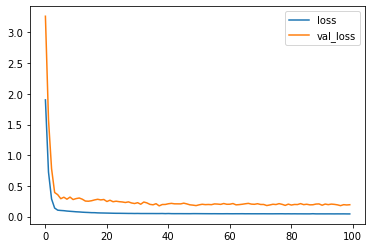

In [59]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

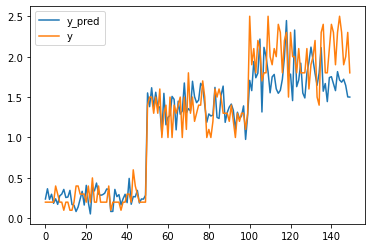

In [60]:
y_pred = model.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(3,), activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='mse', optimizer='sgd')

In [63]:
model.fit(X, y, epochs=100, validation_split=0.25)

Epoch 1/100
4/4 [==============================] - 0s 45ms/step - loss: 0.9321 - val_loss: 0.5805
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1844 - val_loss: 0.2966
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1532 - val_loss: 0.2942
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1376 - val_loss: 0.3237
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1309 - val_loss: 0.4029
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1160 - val_loss: 0.2593
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1145 - val_loss: 0.2578
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0999 - val_loss: 0.2797
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0904 - val_loss: 0.2116
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0838 - val_loss: 0.2954
Epoch 11/100
4/4 [=

Epoch 84/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.1107
Epoch 85/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0182 - val_loss: 0.1198
Epoch 86/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.1167
Epoch 87/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.1005
Epoch 88/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0183 - val_loss: 0.1130
Epoch 89/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0179 - val_loss: 0.1002
Epoch 90/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.1152
Epoch 91/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0179 - val_loss: 0.1222
Epoch 92/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0188 - val_loss: 0.1141
Epoch 93/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.1131
Epoch 94/1

In [64]:
h = model.history.history

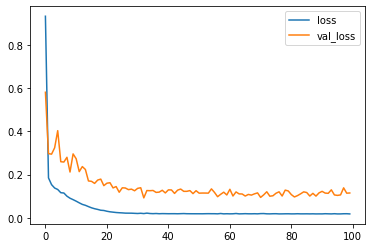

In [65]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

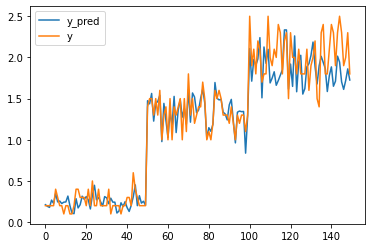

In [66]:
y_pred = model.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.legend(['y_pred', 'y'])